Partial derivatives of the cost function can be extended to the gradient vector to compute them all in one go[1].

Equation 4-5. Partial derivatives of the cost function

$$
\frac{\delta}{\delta\theta_j}MSE(\theta)=\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}-y^{(i)}\right)x_j^{(i)}
$$

Equation 4-6. Gradient vector of the cost function

$$
\nabla MSE(\theta)=
\begin{pmatrix}
\frac{\delta}{\delta\theta_0} MSE(\theta) \\
\frac{\delta}{\delta\theta_1} MSE(\theta) \\
\cdots \\
\frac{\delta}{\delta\theta_n} MSE(\theta)
\end{pmatrix} \\ =
\begin{pmatrix}
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}-y^{(i)}\right)x_0^{(i)} \\
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}-y^{(i)}\right)x_1^{(i)} \\
\cdots \\
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}-y^{(i)}\right)x_j^{(i)} \\
\end{pmatrix}\\ =
\begin{pmatrix}
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}x_0^{(i)}-y^{(i)}x_0^{(i)}\right) \\
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}x_1^{(i)}-y^{(i)}x_1^{(i)}\right) \\
\cdots \\
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}x_j^{(i)}-y^{(i)}x_j^{(i)}\right) \\
\end{pmatrix}\\ =
\frac{2}{m}
\begin{pmatrix}
\theta^{\top}X^{\top}X_0-y^{\top}X_0\\
\theta^{\top}X^{\top}X_1-y^{\top}X_1\\
\cdots \\
\theta^{\top}X^{\top}X_j-y^{\top}X_j\\
\end{pmatrix} \\ =
\frac{2}{m}
\begin{pmatrix}
(\theta^{\top}X^{\top}-y^{\top})X_0\\
(\theta^{\top}X^{\top}-y^{\top})X_1\\
\cdots \\
(\theta^{\top}X^{\top}-y^{\top})X_j\\
\end{pmatrix} \\ =
\frac{2}{m}
\left(X^{\top}\left(\theta^{\top}X^{\top}-y^{\top}\right)^{\top}
\right) \\ =
\frac{2}{m}
X^{\top}\left(X\theta-y\right)
$$
, where n is the number of features, $\theta$ is the model's parameter vector, $X_j$ is column j of $X$, m is the number of instances in the dataset and $y$ is the vector of target values

References:
[1] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurelien Geron

In [1]:
import matplotlib.pyplot as plt
import numpy as np
DEBUG = True

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.17198845],
       [2.8569463 ]])

In [5]:
X_new = np.array([[0], [2]])

In [6]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [7]:
y_predict = X_new_b.dot(theta_best)

In [8]:
y_predict

array([[4.17198845],
       [9.88588106]])

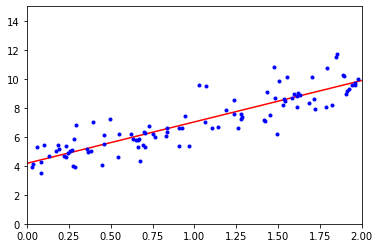

In [9]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lin_reg.intercept_, lin_reg.coef_

(array([4.17198845]), array([[2.8569463]]))

In [12]:
lin_reg.predict(X_new)

array([[4.17198845],
       [9.88588106]])

In [13]:
theta_best_svd, redisuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [14]:
theta_best_svd

array([[4.17198845],
       [2.8569463 ]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[4.17198845],
       [2.8569463 ]])

In [16]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [17]:
theta

array([[4.17198845],
       [2.8569463 ]])

In [18]:
X_b.T.dot(X_b).dot(theta)

array([[702.49402144],
       [806.69224225]])

In [19]:
X_b.T.dot(y)

array([[702.49402144],
       [806.69224225]])

Stochastic Gradient Descent

In [20]:
import numpy.random 
n_epochs = 100
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 /(t + t1)
rng = np.random.default_rng()
theta = rng.standard_normal(size=(2, 1))

In [21]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = rng.integers(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradient
        if False:
            print('random index:', random_index)
            print('xi.shape:', xi.shape)
print('theta:', theta)

theta: [[4.17592007]
 [2.84375778]]


In [22]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [23]:
print('fit sgd:', sgd_reg.intercept_, sgd_reg.coef_)

fit sgd: [4.18973738] [2.90909325]


Polynomial Regression

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + rng.standard_normal(size=(m, 1))

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [26]:
print(X[0])
print(X_poly[0])

[-0.66510641]
[-0.66510641  0.44236654]


In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.03855359] [[1.02957827 0.49111481]]


In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

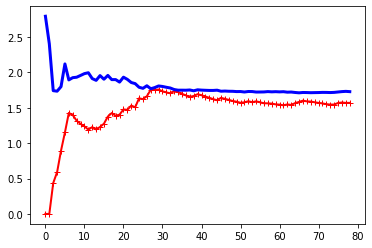

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

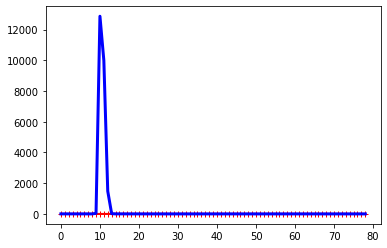

In [30]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

Regularized Linear Models

In [ ]:
Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))


[[5.40816861]]


In [35]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))


[5.40379193]


Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print(lasso_reg.predict([[1.5]]))

[5.37130764]


Elastic Net

In [37]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print(elastic_net.predict([[1.5]]))

[5.36909085]
